# Build a linear model with Estimators

In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import tensorflow.feature_column as fc
import os
import sys
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
tf.enable_eager_execution()

In [4]:
!pip install -q requests

In [4]:
models_path = "C:\GitHub\models"

In [5]:
sys.path.append(models_path)

In [8]:
from official.wide_deep import census_dataset

In [9]:
from official.wide_deep import census_main

In [10]:
census_dataset.download("/tmp/census_data/")

In [11]:
if 'PYTHONPATH' in os.environ:
    os.environ['PYTHONPATH'] += os.pathsep + models_path
else:
    os.environ['PYTHONPATH'] = models_path

In [10]:
!python -m official.wide_deep.census_main --help

Train DNN on census income dataset.
flags:


2018-10-14 12:31:58.405901: I T:\src\github\tensorflow\tensorflow\core\platform\cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\GitHub\models\official\wide_deep\census_main.py", line 116, in <module>
    absl_app.run(main)
  File "C:\ProgramData\Anaconda3\lib\site-packages\absl\app.py", line 294, in run
    flags_parser,
  File "C:\ProgramData\Anaconda3\lib\site-packages\

In [ ]:
!python -m official.wide_deep.census_main --model_type=wide --train_epochs=2

In [14]:
train_file = "/tmp/census_data/adult.data"

In [15]:
test_file = "/tmp/census_data/adult.test"

In [16]:
import pandas

In [17]:
train_df = pandas.read_csv(train_file, header=None, names=census_dataset._CSV_COLUMNS)
test_df = pandas.read_csv(test_file, header=None, names=census_dataset._CSV_COLUMNS)

In [19]:
train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
def easy_input_function(df, label_key, num_epochs, shuffle, batch_size):
  label = df[label_key]
  ds = tf.data.Dataset.from_tensor_slices((dict(df),label))

  if shuffle:
    ds = ds.shuffle(10000)

  ds = ds.batch(batch_size).repeat(num_epochs)

  return ds

In [21]:
ds = easy_input_function(train_df, label_key='income_bracket', num_epochs=5, shuffle=True, batch_size=10)

In [22]:
for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys())[:5])
  print()
  print('A batch of Ages  :', feature_batch['age'])
  print()
  print('A batch of Labels:', label_batch )

Some feature keys: ['age', 'workclass', 'fnlwgt', 'education', 'education_num']

A batch of Ages  : tf.Tensor([19 50 43 26 36 50 39 23 44 21], shape=(10,), dtype=int32)

A batch of Labels: tf.Tensor(
[b'<=50K' b'<=50K' b'<=50K' b'<=50K' b'<=50K' b'<=50K' b'<=50K' b'<=50K'
 b'>50K' b'<=50K'], shape=(10,), dtype=string)


In [23]:
import inspect

In [24]:
print(inspect.getsource(census_dataset.input_fn))

def input_fn(data_file, num_epochs, shuffle, batch_size):
  """Generate an input function for the Estimator."""
  assert tf.gfile.Exists(data_file), (
      '%s not found. Please make sure you have run census_dataset.py and '
      'set the --data_dir argument to the correct path.' % data_file)

  def parse_csv(value):
    tf.logging.info('Parsing {}'.format(data_file))
    columns = tf.decode_csv(value, record_defaults=_CSV_COLUMN_DEFAULTS)
    features = dict(zip(_CSV_COLUMNS, columns))
    labels = features.pop('income_bracket')
    classes = tf.equal(labels, '>50K')  # binary classification
    return features, classes

  # Extract lines from input files using the Dataset API.
  dataset = tf.data.TextLineDataset(data_file)

  if shuffle:
    dataset = dataset.shuffle(buffer_size=_NUM_EXAMPLES['train'])

  dataset = dataset.map(parse_csv, num_parallel_calls=5)

  # We call repeat after shuffling, rather than before, to prevent separate
  # epochs from blending together.
  dataset = 

In [25]:
ds = census_dataset.input_fn(train_file, num_epochs=5, shuffle=True, batch_size=10)

INFO:tensorflow:Parsing /tmp/census_data/adult.data


I1014 14:54:45.277336 23640 tf_logging.py:115] Parsing /tmp/census_data/adult.data


In [26]:
for feature_batch, label_batch in ds.take(1):
  print('Feature keys:', list(feature_batch.keys())[:5])
  print()
  print('Age batch   :', feature_batch['age'])
  print()
  print('Label batch :', label_batch )

Feature keys: ['age', 'workclass', 'fnlwgt', 'education', 'education_num']

Age batch   : tf.Tensor([26 34 30 46 65 42 56 51 65 40], shape=(10,), dtype=int32)

Label batch : tf.Tensor([False False False  True False False  True  True False False], shape=(10,), dtype=bool)


In [27]:
import functools

train_inpf = functools.partial(census_dataset.input_fn, train_file, num_epochs=2, shuffle=True, batch_size=64)
test_inpf = functools.partial(census_dataset.input_fn, test_file, num_epochs=1, shuffle=False, batch_size=64)

In [28]:
feature_batch

{'age': <tf.Tensor: id=282, shape=(10,), dtype=int32, numpy=array([26, 34, 30, 46, 65, 42, 56, 51, 65, 40])>,
 'workclass': <tf.Tensor: id=295, shape=(10,), dtype=string, numpy=
 array([b'Private', b'Private', b'Private', b'Federal-gov', b'Private',
        b'Federal-gov', b'Private', b'Private', b'Private', b'Private'],
       dtype=object)>,
 'fnlwgt': <tf.Tensor: id=287, shape=(10,), dtype=int32, numpy=
 array([ 34402, 216864, 114691, 341762, 255386, 126320, 314727, 120270,
        183170, 306225])>,
 'education': <tf.Tensor: id=285, shape=(10,), dtype=string, numpy=
 array([b'Bachelors', b'HS-grad', b'Bachelors', b'Bachelors', b'HS-grad',
        b'Some-college', b'HS-grad', b'Assoc-voc', b'HS-grad', b'HS-grad'],
       dtype=object)>,
 'education_num': <tf.Tensor: id=286, shape=(10,), dtype=int32, numpy=array([13,  9, 13, 13,  9, 10,  9, 11,  9,  9])>,
 'marital_status': <tf.Tensor: id=290, shape=(10,), dtype=string, numpy=
 array([b'Never-married', b'Divorced', b'Never-married',


In [29]:
age = fc.numeric_column('age')

In [30]:
fc.input_layer(feature_batch, [age]).numpy()

array([[26.],
       [34.],
       [30.],
       [46.],
       [65.],
       [42.],
       [56.],
       [51.],
       [65.],
       [40.]], dtype=float32)

In [31]:
clf = tf.estimator.LinearClassifier(feature_columns=[age])
clf.train(train_inpf)

INFO:tensorflow:Using default config.


I1014 17:23:16.326067 23640 tf_logging.py:115] Using default config.


W1014 17:23:16.329091 23640 tf_logging.py:125] Using temporary folder as model directory: C:\Users\javedsha\AppData\Local\Temp\tmpg9jpcqyz


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\javedsha\\AppData\\Local\\Temp\\tmpg9jpcqyz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020EC0ECF898>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


I1014 17:23:16.332077 23640 tf_logging.py:115] Using config: {'_model_dir': 'C:\\Users\\javedsha\\AppData\\Local\\Temp\\tmpg9jpcqyz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020EC0ECF898>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Parsing /tmp/census_data/adult.data


I1014 17:23:16.378069 23640 tf_logging.py:115] Parsing /tmp/census_data/adult.data


INFO:tensorflow:Calling model_fn.


I1014 17:23:16.436068 23640 tf_logging.py:115] Calling model_fn.


INFO:tensorflow:Done calling model_fn.


I1014 17:23:16.835125 23640 tf_logging.py:115] Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


I1014 17:23:16.838578 23640 tf_logging.py:115] Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


I1014 17:23:17.145570 23640 tf_logging.py:115] Graph was finalized.


INFO:tensorflow:Running local_init_op.


I1014 17:23:17.204313 23640 tf_logging.py:115] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I1014 17:23:17.217569 23640 tf_logging.py:115] Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\javedsha\AppData\Local\Temp\tmpg9jpcqyz\model.ckpt.


I1014 17:23:17.564570 23640 tf_logging.py:115] Saving checkpoints for 0 into C:\Users\javedsha\AppData\Local\Temp\tmpg9jpcqyz\model.ckpt.


INFO:tensorflow:loss = 44.36142, step = 1


I1014 17:23:18.033070 23640 tf_logging.py:115] loss = 44.36142, step = 1


INFO:tensorflow:global_step/sec: 144.195


I1014 17:23:18.726571 23640 tf_logging.py:115] global_step/sec: 144.195


INFO:tensorflow:loss = 37.548737, step = 101 (0.698 sec)


I1014 17:23:18.731071 23640 tf_logging.py:115] loss = 37.548737, step = 101 (0.698 sec)


INFO:tensorflow:global_step/sec: 160.514


I1014 17:23:19.349073 23640 tf_logging.py:115] global_step/sec: 160.514


INFO:tensorflow:loss = 37.422028, step = 201 (0.625 sec)


I1014 17:23:19.356073 23640 tf_logging.py:115] loss = 37.422028, step = 201 (0.625 sec)


INFO:tensorflow:global_step/sec: 164.069


I1014 17:23:19.958571 23640 tf_logging.py:115] global_step/sec: 164.069


INFO:tensorflow:loss = 37.067524, step = 301 (0.607 sec)


I1014 17:23:19.963175 23640 tf_logging.py:115] loss = 37.067524, step = 301 (0.607 sec)


INFO:tensorflow:global_step/sec: 215.982


I1014 17:23:20.422069 23640 tf_logging.py:115] global_step/sec: 215.982


INFO:tensorflow:loss = 37.451202, step = 401 (0.462 sec)


I1014 17:23:20.425210 23640 tf_logging.py:115] loss = 37.451202, step = 401 (0.462 sec)


INFO:tensorflow:global_step/sec: 177.464


I1014 17:23:20.985068 23640 tf_logging.py:115] global_step/sec: 177.464


INFO:tensorflow:loss = 26.145458, step = 501 (0.564 sec)


I1014 17:23:20.989568 23640 tf_logging.py:115] loss = 26.145458, step = 501 (0.564 sec)


INFO:tensorflow:global_step/sec: 151.849


I1014 17:23:21.644068 23640 tf_logging.py:115] global_step/sec: 151.849


INFO:tensorflow:loss = 39.16726, step = 601 (0.661 sec)


I1014 17:23:21.651070 23640 tf_logging.py:115] loss = 39.16726, step = 601 (0.661 sec)


INFO:tensorflow:global_step/sec: 272.517


I1014 17:23:22.010568 23640 tf_logging.py:115] global_step/sec: 272.517


INFO:tensorflow:loss = 40.663666, step = 701 (0.363 sec)


I1014 17:23:22.013569 23640 tf_logging.py:115] loss = 40.663666, step = 701 (0.363 sec)


INFO:tensorflow:global_step/sec: 216.449


I1014 17:23:22.472570 23640 tf_logging.py:115] global_step/sec: 216.449


INFO:tensorflow:loss = 30.247292, step = 801 (0.464 sec)


I1014 17:23:22.477569 23640 tf_logging.py:115] loss = 30.247292, step = 801 (0.464 sec)


INFO:tensorflow:global_step/sec: 174.825


I1014 17:23:23.045073 23640 tf_logging.py:115] global_step/sec: 174.825


INFO:tensorflow:loss = 33.47215, step = 901 (0.571 sec)


I1014 17:23:23.049068 23640 tf_logging.py:115] loss = 33.47215, step = 901 (0.571 sec)


INFO:tensorflow:global_step/sec: 160.383


I1014 17:23:23.668076 23640 tf_logging.py:115] global_step/sec: 160.383


INFO:tensorflow:loss = 37.03144, step = 1001 (0.624 sec)


I1014 17:23:23.673072 23640 tf_logging.py:115] loss = 37.03144, step = 1001 (0.624 sec)


INFO:tensorflow:Saving checkpoints for 1018 into C:\Users\javedsha\AppData\Local\Temp\tmpg9jpcqyz\model.ckpt.


I1014 17:23:23.768069 23640 tf_logging.py:115] Saving checkpoints for 1018 into C:\Users\javedsha\AppData\Local\Temp\tmpg9jpcqyz\model.ckpt.


INFO:tensorflow:Loss for final step: 13.025592.


I1014 17:23:24.057069 23640 tf_logging.py:115] Loss for final step: 13.025592.


In [32]:
result = clf.evaluate(test_inpf)

INFO:tensorflow:Parsing /tmp/census_data/adult.test


I1014 17:23:36.380509 23640 tf_logging.py:115] Parsing /tmp/census_data/adult.test


INFO:tensorflow:Calling model_fn.


I1014 17:23:36.446010 23640 tf_logging.py:115] Calling model_fn.


W1014 17:23:37.805510 23640 tf_logging.py:125] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


W1014 17:23:37.853010 23640 tf_logging.py:125] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


INFO:tensorflow:Done calling model_fn.


I1014 17:23:37.899008 23640 tf_logging.py:115] Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2018-10-14-16:23:37


I1014 17:23:37.948512 23640 tf_logging.py:115] Starting evaluation at 2018-10-14-16:23:37


INFO:tensorflow:Graph was finalized.


I1014 17:23:38.154516 23640 tf_logging.py:115] Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\javedsha\AppData\Local\Temp\tmpg9jpcqyz\model.ckpt-1018


I1014 17:23:38.164009 23640 tf_logging.py:115] Restoring parameters from C:\Users\javedsha\AppData\Local\Temp\tmpg9jpcqyz\model.ckpt-1018


INFO:tensorflow:Running local_init_op.


I1014 17:23:38.238015 23640 tf_logging.py:115] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I1014 17:23:38.281009 23640 tf_logging.py:115] Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2018-10-14-16:23:40


I1014 17:23:40.217940 23640 tf_logging.py:115] Finished evaluation at 2018-10-14-16:23:40


INFO:tensorflow:Saving dict for global step 1018: accuracy = 0.76211536, accuracy_baseline = 0.76377374, auc = 0.6783142, auc_precision_recall = 0.31138125, average_loss = 0.5232865, global_step = 1018, label/mean = 0.23622628, loss = 33.410305, precision = 0.2244898, prediction/mean = 0.23386265, recall = 0.0028601144


I1014 17:23:40.221941 23640 tf_logging.py:115] Saving dict for global step 1018: accuracy = 0.76211536, accuracy_baseline = 0.76377374, auc = 0.6783142, auc_precision_recall = 0.31138125, average_loss = 0.5232865, global_step = 1018, label/mean = 0.23622628, loss = 33.410305, precision = 0.2244898, prediction/mean = 0.23386265, recall = 0.0028601144


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1018: C:\Users\javedsha\AppData\Local\Temp\tmpg9jpcqyz\model.ckpt-1018


I1014 17:23:40.687445 23640 tf_logging.py:115] Saving 'checkpoint_path' summary for global step 1018: C:\Users\javedsha\AppData\Local\Temp\tmpg9jpcqyz\model.ckpt-1018


In [33]:
clear_output()
print(result)

{'accuracy': 0.76211536, 'accuracy_baseline': 0.76377374, 'auc': 0.6783142, 'auc_precision_recall': 0.31138125, 'average_loss': 0.5232865, 'label/mean': 0.23622628, 'loss': 33.410305, 'precision': 0.2244898, 'prediction/mean': 0.23386265, 'recall': 0.0028601144, 'global_step': 1018}


In [34]:
edu_name = tf.feature_column.numeric_column('education_num')
cap_gain = tf.feature_column.numeric_column('capital_gain')
cap_loss = tf.feature_column.numeric_column('capital_loss')
hours_per_week = tf.feature_column.numeric_column('hours_per_week')

my_numeric_columns = [age, edu_name, cap_gain, cap_loss, hours_per_week]

fc.input_layer(feature_batch, my_numeric_columns).numpy()

array([[  26.,    0.,    0.,   13.,   45.],
       [  34.,    0., 3770.,    9.,   45.],
       [  30.,    0.,    0.,   13.,   40.],
       [  46., 7688.,    0.,   13.,   45.],
       [  65.,    0.,    0.,    9.,   40.],
       [  42.,    0.,    0.,   10.,   40.],
       [  56.,    0.,    0.,    9.,   35.],
       [  51.,    0.,    0.,   11.,   40.],
       [  65.,    0.,    0.,    9.,   25.],
       [  40.,    0.,    0.,    9.,   40.]], dtype=float32)

In [35]:
clf_2 = tf.estimator.LinearClassifier(feature_columns=my_numeric_columns)
clf_2.train(train_inpf)

result = clf_2.evaluate(test_inpf)

clear_output()

for key, value in sorted(result.items()):
    print("%s: %s " % (key, value))

accuracy: 0.7812174 
accuracy_baseline: 0.76377374 
auc: 0.7936164 
auc_precision_recall: 0.563432 
average_loss: 3.8537195 
global_step: 1018 
label/mean: 0.23622628 
loss: 246.04865 
precision: 0.56807286 
prediction/mean: 0.34473553 
recall: 0.30811232 


In [36]:
relationship = fc.categorical_column_with_vocabulary_list(
    'relationship',
    ['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried', 'Other-relative'])

In [37]:
type(relationship)

tensorflow.python.feature_column.feature_column._VocabularyListCategoricalColumn

In [38]:
fc.input_layer(feature_batch, [age, fc.indicator_column(relationship)])

<tf.Tensor: id=4576, shape=(10, 7), dtype=float32, numpy=
array([[26.,  0.,  1.,  0.,  0.,  0.,  0.],
       [34.,  0.,  0.,  0.,  0.,  1.,  0.],
       [30.,  0.,  0.,  0.,  0.,  0.,  1.],
       [46.,  1.,  0.,  0.,  0.,  0.,  0.],
       [65.,  0.,  0.,  0.,  0.,  0.,  1.],
       [42.,  1.,  0.,  0.,  0.,  0.,  0.],
       [56.,  1.,  0.,  0.,  0.,  0.,  0.],
       [51.,  1.,  0.,  0.,  0.,  0.,  0.],
       [65.,  0.,  1.,  0.,  0.,  0.,  0.],
       [40.,  0.,  1.,  0.,  0.,  0.,  0.]], dtype=float32)>

In [39]:
occupation = tf.feature_column.categorical_column_with_hash_bucket(
    'occupation', hash_bucket_size=1000)

In [40]:
for item in feature_batch['occupation'].numpy():
    print(item.decode())

Adm-clerical
Other-service
Adm-clerical
Prof-specialty
Craft-repair
Transport-moving
Craft-repair
Sales
Other-service
Craft-repair


In [41]:
occupation_result = fc.input_layer(feature_batch, [fc.indicator_column(occupation)])

occupation_result.numpy().shape

(10, 1000)

In [42]:
tf.argmax(occupation_result, axis=1).numpy()

array([ 96, 527,  96, 979, 466, 420, 466, 631, 527, 466], dtype=int64)

In [43]:
education = tf.feature_column.categorical_column_with_vocabulary_list(
    'education', [
        'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'])

marital_status = tf.feature_column.categorical_column_with_vocabulary_list(
    'marital_status', [
        'Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
        'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'])

workclass = tf.feature_column.categorical_column_with_vocabulary_list(
    'workclass', [
        'Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
        'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'])


my_categorical_columns = [relationship, occupation, education, marital_status, workclass]

In [44]:
clf_3 = tf.estimator.LinearClassifier(feature_columns=my_numeric_columns+my_categorical_columns)

clf_3.train(train_inpf)

result = clf_3.evaluate(test_inpf)

clear_output()

for key, value in result.items():
    print("%s: %s" % (key, value))

accuracy: 0.8416559
accuracy_baseline: 0.76377374
auc: 0.8921689
auc_precision_recall: 0.71349365
average_loss: 0.37686172
label/mean: 0.23622628
loss: 24.061512
precision: 0.6752349
prediction/mean: 0.25157657
recall: 0.6352054
global_step: 1018


In [45]:
age_buckets = tf.feature_column.bucketized_column(
    age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])

In [46]:
fc.input_layer(feature_batch, [age, age_buckets]).numpy()

array([[26.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [34.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [30.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [46.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [65.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [42.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [56.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [51.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [65.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [40.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]],
      dtype=float32)

In [47]:
edu_x_occ = tf.feature_column.crossed_column(
['education', 'occupation'], hash_bucket_size=1000)

In [48]:
age_buckets_x_education_x_occupation = tf.feature_column.crossed_column(
    [age_buckets, 'education', 'occupation'], hash_bucket_size=1000)

In [49]:
import tempfile

In [50]:
base_columns = [
    education, marital_status, relationship, workclass, occupation, age_buckets
]

In [51]:
crossed_columns = [
    tf.feature_column.crossed_column(['education', 'occupation'], hash_bucket_size=1000),
    tf.feature_column.crossed_column([age_buckets, 'education', 'occupation'], hash_bucket_size=1000)
]

In [52]:
model = tf.estimator.LinearClassifier(model_dir=tempfile.mkdtemp(), feature_columns=base_columns + crossed_columns, optimizer=tf.train.FtrlOptimizer(learning_rate=0.1))

INFO:tensorflow:Using default config.


I1015 10:25:13.465950 23640 tf_logging.py:115] Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\javedsha\\AppData\\Local\\Temp\\tmpnhm9c5zb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020EC4C57A90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


I1015 10:25:13.467948 23640 tf_logging.py:115] Using config: {'_model_dir': 'C:\\Users\\javedsha\\AppData\\Local\\Temp\\tmpnhm9c5zb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020EC4C57A90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [53]:
train_inpf = functools.partial(census_dataset.input_fn, train_file, num_epochs=40, shuffle=True, batch_size=64)

In [54]:
model.train(train_inpf)
clear_output()

In [55]:
results = model.evaluate(test_inpf)
clear_output()

for key, value in sorted(results.items()):
    print("%s: %0.2f" % (key, value))

accuracy: 0.84
accuracy_baseline: 0.76
auc: 0.88
auc_precision_recall: 0.69
average_loss: 0.35
global_step: 20351.00
label/mean: 0.24
loss: 22.64
precision: 0.68
prediction/mean: 0.24
recall: 0.56


In [56]:
import numpy as np

predict_df = test_df[:20].copy()

pred_iter = model.predict(
    lambda:easy_input_function(predict_df, label_key='income_bracket',
                               num_epochs=1, shuffle=False, batch_size=10))

classes = np.array(['<=50K', '>50K'])
pred_class_id = []

for pred_dict in pred_iter:
  pred_class_id.append(pred_dict['class_ids'])

predict_df['predicted_class'] = classes[np.array(pred_class_id)]
predict_df['correct'] = predict_df['predicted_class'] == predict_df['income_bracket']

clear_output()

predict_df[['income_bracket','predicted_class', 'correct']]

,income_bracket,predicted_class,correct
0,<=50K,<=50K,True
1,<=50K,<=50K,True
2,>50K,<=50K,False
3,>50K,<=50K,False
4,<=50K,<=50K,True
5,<=50K,<=50K,True
6,<=50K,<=50K,True
7,>50K,>50K,True
8,<=50K,<=50K,True
9,<=50K,<=50K,True


In [57]:
model_l1 = tf.estimator.LinearClassifier(feature_columns=base_columns+crossed_columns,
                                        optimizer=tf.train.FtrlOptimizer(learning_rate=0.1, l1_regularization_strength=10.0, l2_regularization_strength=0.0))

model_l1.train(train_inpf)

results = model_l1.evaluate(test_inpf)

clear_output()

for key in sorted(results):
    print("%s: %0.2f" % (key, results[key]))

accuracy: 0.84
accuracy_baseline: 0.76
auc: 0.88
auc_precision_recall: 0.69
average_loss: 0.35
global_step: 20351.00
label/mean: 0.24
loss: 22.47
precision: 0.68
prediction/mean: 0.24
recall: 0.57


In [58]:
model_l2 = tf.estimator.LinearClassifier(
    feature_columns=base_columns + crossed_columns,
    optimizer=tf.train.FtrlOptimizer(
        learning_rate=0.1,
        l1_regularization_strength=0.0,
        l2_regularization_strength=10.0))

model_l2.train(train_inpf)

results = model_l2.evaluate(test_inpf)
clear_output()
for key in sorted(results):
  print('%s: %0.2f' % (key, results[key]))

accuracy: 0.84
accuracy_baseline: 0.76
auc: 0.88
auc_precision_recall: 0.69
average_loss: 0.35
global_step: 20351.00
label/mean: 0.24
loss: 22.46
precision: 0.69
prediction/mean: 0.24
recall: 0.55


In [59]:
def get_flat_weights(model):
  weight_names = [
      name for name in model.get_variable_names()
      if "linear_model" in name and "Ftrl" not in name]

  weight_values = [model.get_variable_value(name) for name in weight_names]

  weights_flat = np.concatenate([item.flatten() for item in weight_values], axis=0)

  return weights_flat

weights_flat = get_flat_weights(model)
weights_flat_l1 = get_flat_weights(model_l1)
weights_flat_l2 = get_flat_weights(model_l2)

In [60]:
weight_mask = weights_flat != 0

weights_base = weights_flat[weight_mask]
weights_l1 = weights_flat_l1[weight_mask]
weights_l2 = weights_flat_l2[weight_mask]

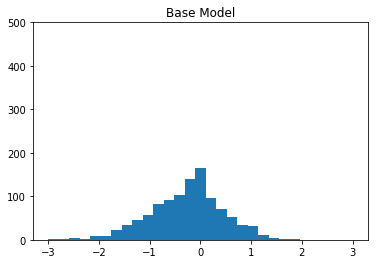

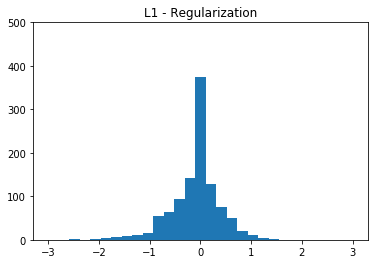

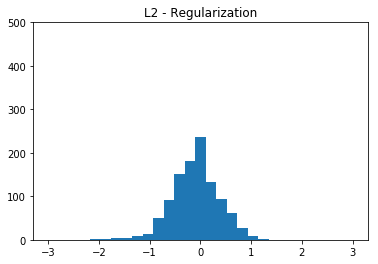

In [61]:
plt.figure()
_ = plt.hist(weights_base, bins=np.linspace(-3,3,30))
plt.title('Base Model')
plt.ylim([0,500])

plt.figure()
_ = plt.hist(weights_l1, bins=np.linspace(-3,3,30))
plt.title('L1 - Regularization')
plt.ylim([0,500])

plt.figure()
_ = plt.hist(weights_l2, bins=np.linspace(-3,3,30))
plt.title('L2 - Regularization')
_=plt.ylim([0,500])
